In [30]:
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph

class State(TypedDict):
    input1: int
    input2: int
    operation: str
    result: int


def validate(state:State):
    if not state.get("input1"):
      state['input1'] = 'No entry.'
    elif not state.get("input2"):
      state["input2"] = 'No entry.'
    elif not state.get("operation_result"):
      state["operation"] = "No entry"
    else:
      return {}


def perform(state:State):
    operation = 0
    if state["operation"] == '+':
       return {'result': state['input1'] + state['input2']}
    elif state["operation"] == '*':
       return {'result': state['input1'] * state['input2']}

def print_result(state:State):
      print(f'The result is: {state['result']}')

In [31]:
builder = StateGraph(State)
builder.add_node(node = '_validate_', action = validate)
builder.add_node(node = '_perform_', action = perform)
builder.add_node(node = '_print_result_', action = print_result)

In [32]:
builder.add_edge(start_key = START, end_key = '_validate_')
builder.add_edge(start_key = '_validate_', end_key = '_perform_')
builder.add_edge(start_key = '_perform_', end_key = '_print_result_')
builder.add_edge(start_key = '_print_result_', end_key = END)

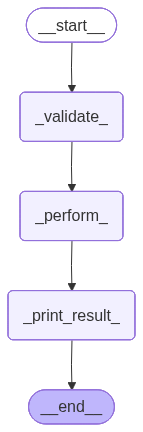

In [33]:
graph = builder.compile()
graph

In [34]:
graph.invoke({'input1': 10, 'input2': 20, 'operation': '*'})

The result is: 200


{'input1': 10, 'input2': 20, 'operation': '*', 'result': 200}